In [1]:
# The user specifies if running notebook on GoogleColab or locally
UseGoogleColab = True

In [2]:
if UseGoogleColab:
    from google.colab import drive
    drive.mount('/content/drive')
    USERDIR='/content/drive/MyDrive/hightea/'
else:
    USERDIR='.'

#Install hightea client and plotting library
%pip install hightea-client > /dev/null
%pip install hightea-plotting > /dev/null
from hightea.client import Interface as hightea
from hightea.plotting import plot,Run

A simple example job

In [3]:
job = hightea('Example-inclusive-jets',directory=USERDIR) # define new job
job.process('pp_j_7000')                                  # specify process for job

   pp -> j + X at 7 TeV 

Process tag         :  pp_j_7000  (use for process specification)
Default scales      :   muR = HT2, muF = HT2 
Default pdf         :  NNPDF31_nnlo_as_0118 / 0
Avail. contributions:  ['NLO', 'LO']
Predefined variables
   pt_j1       :  sqrt(p_j1_1**2 + p_j1_2**2)
   pt_j2       :  sqrt(p_j2_1**2 + p_j2_2**2)
   HT2         :  pt_j1+pt_j2
Jet parameters      :
  maxnjets  :  2
  p  :  -1
  R  :  0.4
Details:

 Parameters

 - pp collisions at 7 TeV
 - number of massless flavours: nl = 5

 Generation cuts

 - anti-kT R = 0.4 jets
 - pT(j1) > 56 GeV
 - |y(j)| < 3.0

 Contributions details

 - LO      : pQCD, aS^2
 - NLO     : pQCD, aS^2 + aS^3

 Citation

 - HighTEA arxiv:xxxx.xxxx
 - Single-jet inclusive rates with exact color at O(aS^4) arXiv:1907.12911


In [4]:
pt_j1_bins = [56.,64.,74.,84.,97.,114.,133.0,153.,174.,196.,220.,245.,272.,
              300.,330.,362.,395.,430.,468.,507.,548.,592.,638.,686.,737.,
              790.,846.,905.,967.,1032.,1101.,1172.,1248.,1327.]

In [5]:
job.contribution('NLO')                          # specify contribution
job.scales('HT2/2','HT2/2')                      # choose renormalization and factorization scale
job.observable('pt_j1',pt_j1_bins)               # specify binning: variable and bin edges
job.scale_variation('3-point')                   # add scale variation
#job.jet_parameters({'maxnjet':2,'p':-1,'R':0.3}) # choose jet parameter

In [6]:
job.request()

token request  0  :  SQc1TXLTeunv29V5merD0DIhyNiDjL92bTmjMMpA-s8
token request  1  :  Wu13vNWOFa1zVnwZw7zL0RwBg6AnUtoyQC0S23rOdgI
token request  2  :  qvyIYbWy3SoCZ8JoVhz_eVU8wZDrId7iOVkATe7D9Nw
request submitted :  2023-03-26 04:10:14.530484
request finished  :  2023-03-26 04:12:29.147913


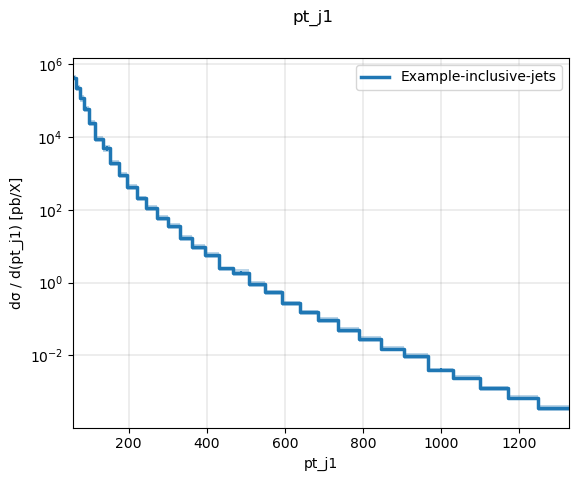

In [7]:
plot(job.result(),logscale=1);

In [8]:
job.show_result()

Name                    :  Example-inclusive-jets
Contributions           :  ['NLO']
muR                     :  HT2/2
muF                     :  HT2/2
fiducial xsection [pb]  :    8.239E+06
  mc-error [pb] ([%])   :  1.6E+05 (2.0E+00)
sys. unc. [pb] ([%])    : scale (3)
                        :  +1.8E+06 (2.2E+01) / -1.4E+06 (1.6E+01)
Histogram     : pt_j1
 bin1 low  | bin1 high | sigma [pb]  | mc-err [pb] ([%]) | scale (3) [pb] ([%])                    |
 5.600E+01 | 6.400E+01 |   3.406E+06 | 2.7E+05 (7.8E+00) | +6.6E+05 (1.9E+01) / -5.2E+05 (1.5E+01) |
 6.400E+01 | 7.400E+01 |   2.194E+06 | 2.3E+05 (1.1E+01) | +4.9E+05 (2.2E+01) / -3.7E+05 (1.7E+01) |
 7.400E+01 | 8.400E+01 |   1.136E+06 | 1.2E+05 (1.0E+01) | +2.9E+05 (2.5E+01) / -2.1E+05 (1.8E+01) |
 8.400E+01 | 9.700E+01 |   7.591E+05 | 8.1E+04 (1.1E+01) | +1.7E+05 (2.3E+01) / -1.3E+05 (1.7E+01) |
 9.700E+01 | 1.140E+02 |   4.003E+05 | 3.6E+04 (8.9E+00) | +9.8E+04 (2.5E+01) / -7.2E+04 (1.8E+01) |
 1.140E+02 | 1.330E+02 |   1.645E+